**Problem 1**

**CODING:** This is a continuation of HW7 where you will learn how to perform non-linear regression and also see how more data improves the statistical quality of the data and the resulting parameter constraints.  There are 10 data files `run[0-9].dat` that contain hypothetical particle-physics spectral data (energy vs counts) of a search for a new particle called the *Riggs boson*.  The data were taken independently in 10 distinct runs.  The columns are 1) energy $E$ (GeV) and 2) counts $N$ (number of events in that energy bin).
  
       1.0    96
       2.0    99
       3.0   111
       4.0   124
       5.0   105
       6.0   102
       ...

  
  A signal of a new particle consists of a gaussian on top of a smooth background.  Model the spectrum with a function given by:
$$
  N(E) = a + bE +cE^2 + Ae^{-(E-E_{\mathrm{Riggs}})^2/(2\sigma_E^2)}
$$
where we now have 6 fit parameters -- $a,b,c,A,E_{\mathrm{Riggs}},\sigma_E$.  The first three terms make up the background, the last term represents the signal.  We assume here that $\sigma_E$ and $E_{\mathrm{Riggs}}$ are unknown, but they are expected to be in the range 1 - 5 GeV and 40 - 90 GeV, respectively.

a) (4 pts) In this first part, use only the first data file `run0.dat`.  Use `scipy.optimize.curve_fit` to determine the best-fit values of the parameters and the covariance matrix.  Can you claim a detection of the Riggs boson?  Justify your answer.

b) (3 pts) Since the 10 datasets are independent, the counts can simply be added to produce a dataset with higher statistical quality.  Successively add the counts in `run1.dat`, `run2.dat`, and so on and repeat the fits.  After which run can you claim a $5\sigma$ detection of the Riggs?

c) (3 pts) Using data from all 10 runs, measure the energy $E_{\mathrm{Riggs}}$ and uncertainty of the the Riggs boson.  What is the final significance (in units of $\sigma$) of the detection?


In [1]:
import numpy as np
import pandas as pd
import scipy.optimize

# Problem 1a
def read_riggs_data(n):
    """
    Read the data file for run n, where 0 <= n <= 9.
    
    The file name is run[n].dat.  (I.e. run0.dat, run1.dat, ... run9.dat)
    
    Returns E, N for this run as numpy arrays
    """
    # Hint: If you use pandas to read the file, to_numpy() will convert to a numpy array

    ### BEGIN SOLUTION
    fname = 'run{}.dat'.format(n)
    df = pd.read_csv(fname,
                     names=['E', 'N'],  # Give the names of the columns
                     delim_whitespace=True,       # The default is to use ',' as the delimiter. 
                    )
    return df['E'].to_numpy(), df['N'].to_numpy()
    ### END SOLUTION

def riggs_model(E, a, b, c, A, E_Riggs, sigma_E):
    """
    Return the expected counts given the model for the Riggs boson.
    
        N(E) = a + b E + c E**2 + A exp(-(E-E_Riggs)**2/(2 sigma_E**2))
    
    On input, E is an array.  The other parameters are scalars.
    
    Returns N(E) given the model parameters.
    """
    ### BEGIN SOLUTION
    return a + b*E + c*E**2 + A*np.exp(-(E-E_Riggs)**2 / (2*sigma_E**2))
    ### END SOLUTION

def fit_riggs_model(E, N):
    """
    Find the best fit model given the observed data N(E)

    Returns the parameters [a, b, c, A, E_Riggs, sigma_E] as a numpy array 
    and the covariance matrix, also as a numpy array.
    """
    # Hints:
    # 1. Use scipy.optimize.curve_fit
    # 2. Make sure to set the uncertainties correctly based on Poisson errors (sigma_N = sqrt(N))
    # 3. Set the bounds appropriately for E_Riggs and sigma_E based on the problem statement.
    # 4. For the amplitude, we know it's positive, so [0,1.e10] is appropriate.
    # 5. For the first three [-1.e10,1.e10] is fine. (i.e. basically no prior information, although
    #    it is helpful to put some kind of upper bounds other than infinity).
    
    ### BEGIN SOLUTION
    return scipy.optimize.curve_fit(riggs_model, E, N, sigma=np.sqrt(N), absolute_sigma=True,
                                    bounds=([-1.e10,-1.e10,-1.e10,0,40,1],[1.e10,1.e10,1.e10,1.e10,90,5]))
    ### END SOLUTION
    
def calculate_significance(params, cov):
    """
    Calculate the significance of a possible detection of the Riggs boson.
    
    params = [a, b, c, A, E_Riggs, sigma_E]
    cov = the estimated covariance matrix
    
    Returns the S/N of the purported detection.
    """
    ### BEGIN SOLUTION
    # The S/N of A is the one we want.  That's the amplitude of the signal.
    return params[3] / np.sqrt(cov[3,3])
    ### END SOLUTION
    
def calculate_energy(params, cov):
    """
    Calculate the estimated value of E_Riggs and its uncertainty.

    params = [a, b, c, A, E_Riggs, sigma_E]
    cov = the estimated covariance matrix
    
    Returns the estimate of (E_Riggs, sigma(E_Riggs)).
    """
    ### BEGIN SOLUTION
    return params[4], np.sqrt(cov[4,4])
    ### END SOLUTION

params =  [2.33704904e+01 1.34221946e-01 9.66932201e-03 2.41676060e-01
 6.49171224e+01 1.00000000e+00]
sigma =  [1.70558192e+00 9.45856906e-02 1.00816843e-03 8.14755692e+00
 3.64700681e+01 3.76879059e+01]
Significance =  0.0296623960436271


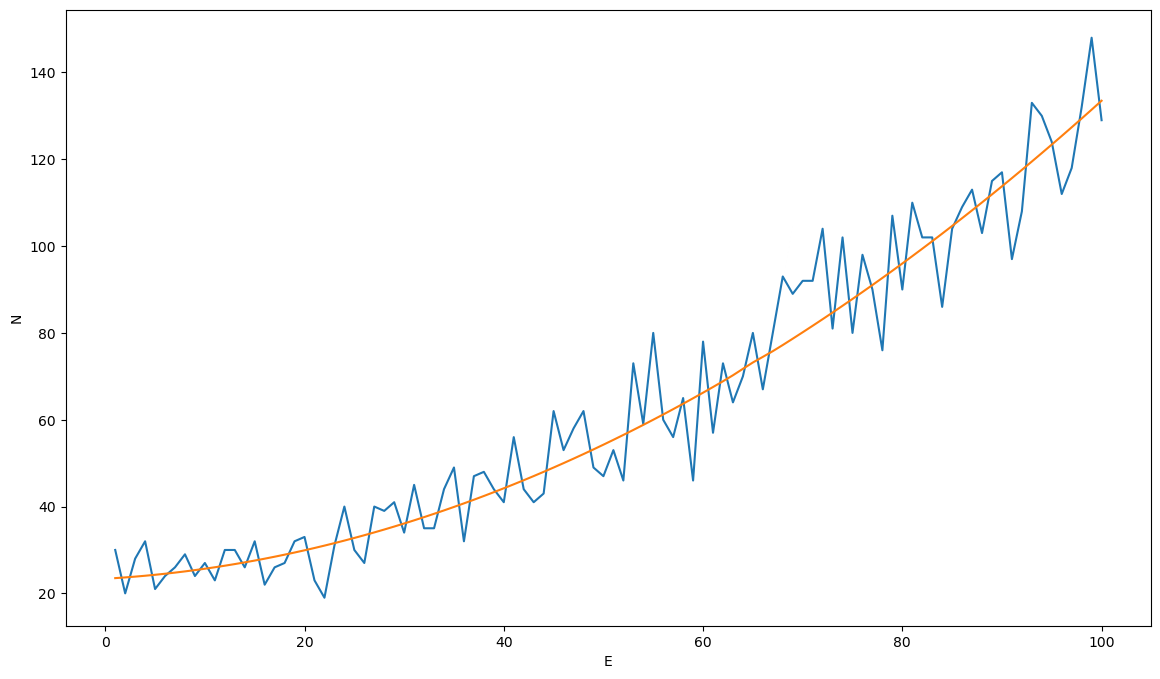


Total of 0 test failures


In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

E, N = read_riggs_data(0)

params, cov = fit_riggs_model(E,N)

print('params = ',params)
print('sigma = ',np.sqrt(np.diag(cov)))
print('Significance = ',calculate_significance(params, cov))

# Quick and dirty visualization of the data and the fit
fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(E,N)
ax.plot(E,riggs_model(E,*params))
ax.set_xlabel('E')
ax.set_ylabel('N')
plt.show()
### BEGIN HIDDEN TESTS

# This code snippet lets us just log the test failures so we can see all the things that fail, rather than
# bomb out on the first failure.  Then at the end, we just assert that there were 0 failures to get the
# automatic grading to give points.
nfail=0
from contextlib import contextmanager
import traceback
@contextmanager
def log_assert():
    global nfail
    try:
        yield
    except AssertionError as e:
        print('Failed assert:')
        print(traceback.format_stack()[-3].split('\n')[1])
        print('    msg =',str(e))
        nfail += 1

# Check that E, N are correct
with log_assert():
    assert len(E) == 100    
with log_assert():
    assert len(N) == 100
with log_assert():
    assert np.allclose(E, np.arange(1,101))

# Don't check the answer too precisely, since slight differences in the bounds can make a big difference.
# So if they didn't exactly follow my advice about the bounds, they may get a very different answer.
# However, the reliable thing is that the significance should be correct given params and cov.
# And that significance should definitely be < 5.

with log_assert():
    assert calculate_significance(params, cov) < 5, calculate_significance(params, cov)

with log_assert():
    assert np.isclose(calculate_significance(params, cov), params[3]/np.sqrt(cov[3,3])), (calculate_significance(params, cov), params[3]/np.sqrt(cov[3,3]))

# The energy calculation is actually for 1c, but I don't have another set of unit tests there, so test this
# here.  If it fails, this should count against the points for 1c below.
with log_assert():
    assert np.isclose(calculate_energy(params, cov)[0], params[4]), (calculate_energy(params, cov)[0], params[4])
with log_assert():
    assert np.isclose(calculate_energy(params, cov)[1], np.sqrt(cov[4,4])), (calculate_energy(params, cov)[1], np.sqrt(cov[4,4]))
    
print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

(Problem 1a) 

Can you claim a detection of the Riggs boson?  Justify your answer.

----

### BEGIN SOLUTION

The amplitude of the Riggs particle part is measured to be A = 0.24 +- 8, which is consistent with zero.  With different bounds on E_Riggs, it's possible to get a ~3 sigma detection.  But we usually require 5 sigma to count as a reliable detection, so even this would not really be considered a detection in high energy physics.

### END SOLUTION


i=0: nu = 0.0296623960436271, E = 64.91712235953037 +- 36.470068089458216
i=1: nu = 3.8911625869576523, E = 69.99447374297726 +- 1.0439373899124127
i=2: nu = 4.274119746832252, E = 69.41029407051636 +- 0.8014501821811308
i=3: nu = 4.649768678154091, E = 69.03653413947113 +- 0.7945365695603271
i=4: nu = 5.411372479768359, E = 68.93471670253854 +- 0.6318929308901221
i=5: nu = 6.3904135810826475, E = 68.7140534924781 +- 0.5789384359004401
i=6: nu = 6.284899240549772, E = 69.01535700306229 +- 0.5241071521078106
i=7: nu = 7.012040310160882, E = 68.662335097864 +- 0.4367421449793395
i=8: nu = 6.764101439749836, E = 68.72696528318761 +- 0.4587067445351811
i=9: nu = 7.114227914889204, E = 68.82832028474867 +- 0.40369971661831433


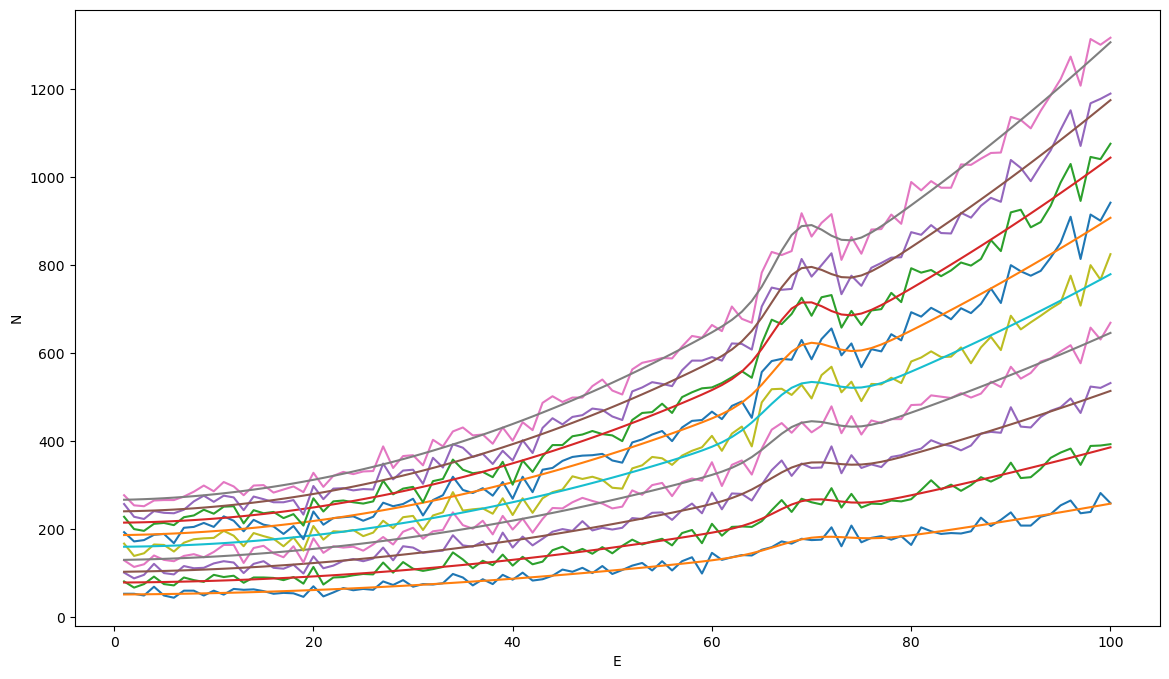

In [3]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

E, N = read_riggs_data(0)
params, cov = fit_riggs_model(E,N)
nu = calculate_significance(params, cov)
E_R, sig = calculate_energy(params, cov)
print('i=0: nu = {}, E = {} +- {}'.format(nu,E_R,sig))

for i in range(1,10):
    #print('N  = ',N)
    Ei, Ni = read_riggs_data(i)
    #print('Ni = ',Ni)
    assert np.allclose(E,Ei)
    N += Ni

    params, cov = fit_riggs_model(E,N)
    nu = calculate_significance(params, cov)
    E_R, sig = calculate_energy(params, cov)
    print('i={}: nu = {}, E = {} +- {}'.format(i,nu,E_R,sig))

    ax.plot(E,N)
    ax.plot(E,riggs_model(E,*params))

ax.set_xlabel('E')
ax.set_ylabel('N')
plt.show()

(Problem 1b) 

After which run can you claim a 5 sigma detection of the Riggs?

### BEGIN SOLUTION
After i=4 (i.e. 5 total runs), the significance is 5.4, so >5 sigma.
### END SOLUTION

(Problem 1c) 

Using data from all 10 runs, measure the energy E_Riggs and uncertainty of the the Riggs boson. 

### BEGIN SOLUTION
The estimated energy is 68.8 +- 0.4 GeV.
### END SOLUTION

----

What is the final significance of the detection?

### BEGIN SOLUTION
The final significance is 7.1.
### END SOLUTION

**Problem 2**

**CODING:** Markov Chain Monte Carlo (MCMC) is a powerful tool for sampling the posterior distribution of complicated models.  The best way to learn how to implement this is through an example,.  In this problem, you will redo parts of HW6 Problem 2) using the Metropolis-Hastings MCMC algorithm.

Recall that we were tasked to model the relation between the number of satellites that reenter the Earth $N_{\mathrm{reentry}}$ and the average number of sunspots $N_{\mathrm{sunspot}}$ in a given year.  The data are provided in `ReentryData.dat`.  We used the following model:
$$
  N_{\text{reentry}} = a + b N_{\text{sunspot}}
$$
where $a$ and $b$ are the fitting parameters.  Using the analytic solution to the MLE, we saw that the posterior distribution is characterized by the means and covariance matrix given by:
$$
\begin{align}
    \left( \begin{array}[r] ~ a \\ b \end{array} \right)
    &=
    \left( \begin{array}[r] ~ 13.11 \\ 0.110 \end{array} \right) &
    \Sigma &=
    \left( \begin{array}[rr] ~ 1.84 & -0.0141 \\ -0.0141 & 0.000169 \end{array} \right)
\end{align}
$$
  

a) (8 pts) Construct a Markov Chain as follows:
   * Initialization:  Start with the best-fit parameters $\vec{x}_{\mathrm{old}} = (13.11~0.110)$.  Calculate the value of the likelihood $\mathscr{L}(\vec{x}_{\mathrm{old}})$ at this point.  The step sizes $\delta\vec{x}$ must be chosen appropriately such that 
    
   * For each iteration:
     * Generate a candidate random step from $\vec{x}_{\mathrm{old}}$ by drawing a pair of random numbers $\vec{r}$ from a normal distribution $\mathscr{N}(0, \delta\vec{x})$.  Your candidate point is $\vec{x}_{\mathrm{new}} = \vec{x}_{\mathrm{old}} + \vec{r}$.
     * Calculate the ratio $R = \mathscr{L}(\vec{x}_{\mathrm{new}})/\mathscr{L}(\vec{x}_{\mathrm{old}})$.
     * Determine whether to accept or reject the candidate step:
       - If $R \geq 1$, take the proposal step (accept).
       - else if $R < 1$, then draw a random number $U$ from a uniform distribution between 0 and 1.
         * If $U < R$, take the proposal step (accept).
         * else if $U \geq R$, do not take the step (reject).
         
   Do $10^5$ iterations and choose $\delta\vec{x}$ such that $\sim 50\%$ ($30-70\%$) of the candidate steps are accepted.  The output should be a Markov chain (list) of accepted steps $\{\vec{x}\}$.
    
b) (4 pts) Using the Markov chain from above, calculate the sample means $(\bar{a}~\bar{b})$ and covariance matrix, and check that the values are nearly identical to those from the analytic MLE.
    
c) (3 pts) Install the plotting package \texttt{corner} in your Anaconda installation.
    
       conda install corner
    
   If you run into problems, see:

   http://corner.readthedocs.io/en/latest/install.html
    
   This package allows you to easily visualize the variance and covariance of an MCMC chain.  A quick-start guide can be found here:

   http://corner.readthedocs.io/en/latest/pages/quickstart.html

   Use this package to visualize the Markov chain, which is just a sampling of the bivariate gaussian characterized by the means and covariance matrix.


In [4]:
# Problem 2a

def read_sat_data():
    """Read the satellite and sunspot data and convert sunspots to mean number per year.
    
    Returns n_sunspots, n_satellites as numpy arrays.
    """
    # Hints:
    # 1. Remember to limit the range to the years with data for both sunspots and satellites.
    # 2. Feel free to copy the code from the HW6 solution set.
    
    ### BEGIN SOLUTION
    sun_df = pd.read_csv('SunspotNumber.dat', 
                         names=['year', 'month', 'day', 'sunspots'],  # Give the names of the columns
                         delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                         na_values=-1,  # Tell pandas that -1 means No Data.
                        )
    n_sunspots = sun_df.groupby(['year'])['sunspots'].mean()

    sat_df = pd.read_csv('SatelliteReentry.dat',
                         names=['year', 'reentries'],  # Give the names of the columns
                         delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                        )
    n_reentries = sat_df.set_index('year')['reentries']
    
    common_indx = n_sunspots.index.intersection(n_reentries.index)    
    return n_sunspots[common_indx].to_numpy(), n_reentries[common_indx].to_numpy() 
    ### END SOLUTION
    
def sat_likelihood(data, theta):
    """Compute the likelihood of our data given a set of parameters theta.
    
    In our case, data is a tuple of numpy arrays: (n_sunspots, n_reentries) and theta is the tuple (a,b).

    The likelihood is a Gaussian, assuming the uncertainty in n_reentries is sqrt(n_reentries).
    And note that since only relative likelihoods for different choices of theta are relevant, 
    you can ignore any constant factors that are independent of theta.
    
    Returns the likelihood for this choice of theta.
    """
    # Hint: This function will be called A LOT during the chain.
    #       You really want to avoid having any loops in this function.
    #       Use numpy array math and things like np.sum to avoid explicit loops.
    #       If you don't know how to do this, you might want to look at how similar 
    #       functions were implemented in past solution sets.
    
    ### BEGIN SOLUTION
    Ns, Nr = data
    a, b = theta
    sigma_sq = Nr  # Here sigma^2 = Nr.  But use sigmasq when we are using it as
                   # sigma^2 to be clearer about what the meaning is in different places.
    
    # L = Prod_i 1/(sqrt(2pi) sigma_i) * exp(-1/2 (Nr_i-a-bNs_i)^2/sigma_i^2)
    
    # The factor 1/sqrt(2pi) in each term is obviously a constant, so we can ignore that.
    # The factor 1/sigma_i is also independent of theta, so we can ignore that.
    
    # L' = Prod_i exp(-1/2 (Nr_i-a-bNs_i)^2/sigma_i^2)
    
    # It's a bit more efficient to compute the (natural) log of the likelihood and then
    # compute exp(loglike) at the end.  In fact, more sophisticated MCMC codes generally
    # leave things in the log rather than ever calling exp.  However, the code for the
    # step function would be different if we were using loglike, so here we'll go ahead
    # and finish the calculation by converting to the regular likelihood at the end.    

    # log(L') = Sum_i (-1/2 (Nr_i-a-bNs_i)^2/sigma_i^2)
    #         = -1/2 Sum_i ((Nr_i-a-bNs_i)^2/sigma_i^2)
    loglike = -0.5 * np.sum((Nr-a-b*Ns)**2/sigma_sq)
    like = np.exp(loglike)
    return like
    ### END SOLUTION

In [5]:
import time

n_sunspots, n_reentries = read_sat_data()

print('n_sunspots = ',n_sunspots)
print('n_reentries = ',n_reentries)
print('len = ',len(n_sunspots),len(n_reentries))

# Make sure the data are clipped to the same time period.
assert len(n_sunspots) == len(n_reentries)

# Make sure we convert to numpy arrays if necessary.
assert type(n_sunspots) == np.ndarray
assert type(n_reentries) == np.ndarray

# Check our likelihood function
data = (n_sunspots, n_reentries)
mle_theta = (13.11, 0.110)  # This is approximately the MLE solution from HW6.
print('Likelihood at MLE solution = ',sat_likelihood(data, mle_theta))

# This is expected to be the maximum likelihood.  Make sure it is a peak.
print('Likelihood at some other nearby locations:')
for theta in [ (13.05, 0.11), (13.15, 0.11), (13.11, 0.105), (13.11, 0.115)]:
    print('   L({}) = {}'.format(theta, sat_likelihood(data, theta)))
    assert sat_likelihood(data, theta) < sat_likelihood(data, mle_theta)

# Finally, make sure our likelihood function is fast enough to run many thousands of times in the MCMC.
t0 = time.time()
for i in range(100):
    theta = np.random.random(2) * 10
    sat_likelihood(data,theta)  # ignore return value
t1 = time.time()
print('time to run sat_likelihood 100 times = ',t1-t0)

t2 = time.time()
for i in range(10000):
    theta = np.random.random(2) * 100
    sat_likelihood(data,theta)  # ignore return value
t3 = time.time()
print('time to run sat_likelihood 10,000 times = ',t3-t2)
assert t3-t2 < 5
# If this is more than 5 seconds, you need to work on speeding it up.
# Note: for the official solution, this takes under 0.1 second on a modern laptop.
### BEGIN HIDDEN TESTS
nfail=0

# The absolute value of the "likelihood" doesn't have to match the official answer, since they are
# allowed to (but not required to) ignore constant prefactors.  However, the ratios should match.
ref = sat_likelihood(data, mle_theta)
true_ref = -0.5 * np.sum((data[1]-mle_theta[0]-mle_theta[1]*data[0])**2/data[1])
for theta in [ (13.05, 0.11), (13.15, 0.11), (13.11, 0.105), (13.11, 0.115)]:
    like = sat_likelihood(data, theta)
    true_loglike = -0.5 * np.sum((data[1]-theta[0]-theta[1]*data[0])**2/data[1])
    true_ratio = np.exp(true_loglike - true_ref)
    their_ratio = like / ref
    assert np.isclose(their_ratio, true_ratio), (their_ratio, true_ratio)
    
print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

n_sunspots =  [149.36712329 147.9890411   94.4         97.61202186  54.1260274
  49.21643836  22.49863014  18.41530055  39.32054795 130.99178082
 220.06027397 218.94808743 198.87671233 162.37808219  90.95068493
  60.4863388   20.57808219  14.76438356  33.86575342 122.99726776
 211.05205479 191.76164384 203.2739726  132.9863388   76.09589041
  44.88493151  25.0739726   11.56010929  28.9369863   88.25753425
 136.32876712 173.8579235  170.40821918 163.56164384  99.2739726
  65.33606557]
n_reentries =  [26 25 19 12 14 21 15 16 18 33 42 41 32 19 28 14 17 16 13 33 45 30 40 41
 28 17 20 22 21 30 25 37 41 38 31 19]
len =  36 36
Likelihood at MLE solution =  3.92323649727156e-12
Likelihood at some other nearby locations:
   L((13.05, 0.11)) = 3.913846437681417e-12
   L((13.15, 0.11)) = 3.916995561224497e-12
   L((13.11, 0.105)) = 3.1554289489843254e-12
   L((13.11, 0.115)) = 3.1158745449705063e-12
time to run sat_likelihood 100 times =  0.0013630390167236328
time to run sat_likelihood 10,000 ti

**Aside:** *Quick overview of Python Classes*

Those of you who have used Python classes before, feel free to skip this section.  For the rest of you, this should hopefully give you the basics of what you need to know about classes to complete this assignment.

A class (in any object-oriented language, not just Python) is a data structure that holds some combination of data, typically stored as attributes, along with some functions that can act on those data.

One class you are probably already somewhat familiar with in Python (although you may not have thought of it as a class) is a list.  Every list you make (e.g. `l1 = [1,2,3]`) is an instance of the native Python class `list`.  You can access the class name of any object in Python using a special "dunder" (short for double underscore) attribute `__class__`.  Similarly, you can any object's doc string using `__doc__`:

    >>> l1 = [1,2,3]
    >>> print(l1.__class__)
    <class 'list'>
    >>> print(l1.__doc__)
    Built-in mutable sequence.

    If no argument is given, the constructor creates a new empty list.
    The argument must be an iterable if specified.

The more interesting attributes are functions, which can act on the object's data.  These are called methods in the standard terminology, to distinguish from free functions, not embedded in a class.  Some methods of `list` that you might be familiar with include `sort`, `append`, `reverse`, and `clear`:

    >>> l2 = [5, 1, 12, 8, 0]
    >>> l2.sort()
    >>> print(l2)
    [0, 1, 5, 8, 12]
    >>> l2.append(6)
    >>> print(l2)
    [0, 1, 5, 8, 12, 6]
    >>> l2.reverse()
    >>> print(l2)
    [6, 12, 8, 5, 1, 0]
    >>> l2.clear()
    >>> print(l2)
    []

Python makes it easy to define your own classes, which we will do for this problem.  We'll define a class called `MCMC`, which we'll use to keep track of the samples of the Markhov Chain as we run through a bunch of steps.  We will make an instance of this class according to a number of parameters:

    sat_mcmc = MCMC(sat_likelihood, data, theta, step_size, names)
    
This looks a bit like a function call, but the right hand side is the name of the class, followed by the parameters we'll use when making the class.  The initialization is actually done by a method called `__init__`, which is defined in the class definition.  More details on what all these parameters mean are given in the doc string below.

The return value, which we named `sat_mcmc` is an instance of the `MCMC` class, which we can use to run the chain by calling various methods:

    sat_mcmc.burn(100)
    sat_mcmc.run(10000)
    
and then make some visualizations to see how the run is progressing:

    sat_mcmc.plot_samples()
    sat_mcmc.plot_hist()

These methods are all already defined for you, since they are fairly straightforward.  The real meat of the calculation is in the `step` method, which carries out one step of the chain.  This method you will need to write yourself.  

You'll note that the first argument of each method defined below is a special parameter called `self`.  This is the name of the instance that was used to call the method.  E.g. when you call `sat_mcmc.burn(100)`, this turns into a call to `MCMC.burn` with the first parameter being `self=sat_mcmc` and the second parameter being `nburn=100`.  This lets you access the stored attributes of current instance from inside the function definition (e.g. those that are set in the `__init__` like `self.nparams` or `self.step_size`) or call other methods (e.g. `self.step()`).

When writing the definition of `MCMC.step`, you'll need to use some of the parameters that are saved for you in the initialization, and also update some state parameters to effect a single Metropolis Hastings step.  You can write to any saved attribute just like how you write to a normal variable.  For instance,

    self.naccept += 1
    
will add 1 to the `naccept` attribute of the current instance, which in our case would be `sat_mcmc`.

For another overview of Python classes, here is a pretty good one:

https://www.dataquest.io/blog/using-classes-in-python/

In [6]:
# Problem 2a (continued)
class MCMC:
    """Class that can run an MCMC chain using the Metropolis Hastings algorithm

    This class is based heavily on the "Trivial Metropolis Hastings" algorithm discussed in lecture.
    If you haven't used classes before, you can think of it as just a way of organizing the variables
    and functions related to the MCMC operation.

    You use it by creating an instance of the class as follows:

        mcmc = MCMC(likelihood, data, theta, step_size)

    The parameters here are:

        likelihood is a function returning the likelihood p(data|theta), which needs to be
            defined outside the class.  The function should take two variables (data, theta) and 
            return a single value p(data | theta).

        data is the input data in whatever form the likelihood function is expecting it.  
            This is fixed over the course of running an MCMC chain.

        theta is a list or array with the starting parameter values for the chain.

        step_size is a list or array with the step size in each dimension of theta.


    Then once you have an MCMC object, you can use it by running the following functions:

        mcmc.burn(nburn) runs the chain for nburn steps, but doesn't save the values.

        mcmc.run(nsteps) runs the chain for nsteps steps, saving the results.

        mcmc.accept_fraction() returns what fraction of the candidate steps were taken.

        mcmc.get_samples() returns the sampled theta values as a 2d numpy array.


    There are also simple two plotting functions that you can use to look at the behavior of the chain.

        mcmc.plot_hist() plots a histogram of the sample values for each paramter.  As the chain
            runs for more steps, this should get smoother.
        
        mcmc.plot_samples() plots the sample values over the course of the chain.  If the burn in is
            too short, it should be evident as a feature at the start of these plots.


    Finally, there is only one method you need to write yourself.
    
        mcmc.step() takes a single step of the chain.
    """
    def __init__(self, likelihood, data, theta, step_size, names=None, seed=314159):
        self.likelihood = likelihood
        self.data = data
        self.theta = np.array(theta)
        self.nparams = len(theta)
        self.step_size = np.array(step_size)
        self.rng = np.random.RandomState(seed)
        self.naccept = 0
        self.current_like = likelihood(self.data, self.theta)
        self.samples = []
        if names is None:
            names = ["Paramter {:d}".format(k+1) for k in range(self.nparams)]
        self.names = names            

    def step(self, save=True):
        """Take a single step in the chain"""
        # 1. Calculate the new theta value.
        # 2. Calculate the likelihood for that theta.       
        # 3. Decide whether or not to take the step.
        # 4. If taking the step, update self.current_like and self.theta.
        # 5. If save==True, add the sample to self.samples and maybe add 1 to self.naccept.
        
        # Hint: For the random numbers use the stored RandomState, not np.random functions.
        #       Otherwise the comments below about how your results should look might not make much sense.
        #       E.g. self.rng.normal, not np.random.normal.
        #            and self.rng.uniform, not np.random.uniform, etc.
        #       In general, using a well-defined random seed will help keep things repeatable
        #       while still have pseudo-random behavior in your programs.

        ### BEGIN SOLUTION
        # 1. Calculate the new theta value.
        new_theta = self.theta + self.step_size * self.rng.normal(size=len(self.step_size))
        
        # 2. Calculate the likelihood for that theta.
        new_like = self.likelihood(self.data, new_theta)
        
        # 3. Decide whether or not to take the step.
        ratio = new_like / self.current_like
        if ratio >= 1:
            take_step = True
        else:
            take_step = self.rng.uniform() < ratio

        # 4. If taking the step, update self.current_like and self.theta.
        if take_step:
            self.current_like = new_like
            self.theta = new_theta

        # 5. If save==True, add the sample to self.samples and maybe add 1 to self.naccept.
        if save:
            self.samples.append(self.theta)
            if take_step: 
                self.naccept += 1
        ### END SOLUTION

    def burn(self, nburn):
        """Take nburn steps, but don't save the results"""
        for i in range(nburn):
            self.step(save=False)

    def run(self, nsteps):
        """Take nsteps steps"""
        for i in range(nsteps):
            self.step()

    def accept_fraction(self):
        """Returns the fraction of candidate steps that were accpeted so far."""
        if len(self.samples) > 0:
            return float(self.naccept) / len(self.samples)
        else:
            return 0.
        
    def clear(self, step_size=None, theta=None):
        """Clear the list of stored samples from any runs so far.
        
        You can also change the step_size to a new value at this time by giving a step_size as an
        optional parameter value.
        
        In addition, you can reset theta to a new starting value if theta is not None.
        """
        if step_size is not None:
            assert len(step_size) == self.nparams
            self.step_size = np.array(step_size)
        if theta is not None:
            assert len(theta) == self.nparams
            self.theta = np.array(theta)
            self.current_like = self.likelihood(self.data, self.theta)
        self.samples = []
        self.naccept = 0
        
    def get_samples(self):
        """Return the sampled theta values at each step in the chain as a 2d numpy array."""
        return np.array(self.samples)
        
    def plot_hist(self):
        """Plot a histogram of the sample values for each parameter in the theta vector."""
        all_samples = self.get_samples()
        for k in range(self.nparams):
            theta_k = all_samples[:,k]
            plt.hist(theta_k, bins=100)
            plt.xlabel(self.names[k])
            plt.ylabel("N Samples")
            plt.show()
        
    def plot_samples(self):
        """Plot the sample values over the course of the chain so far."""
        all_samples = self.get_samples()
        for k in range(self.nparams):
            theta_k = all_samples[:,k]
            plt.plot(range(len(theta_k)), theta_k)
            plt.xlabel("Step in chain")
            plt.ylabel(self.names[k])
            plt.show()

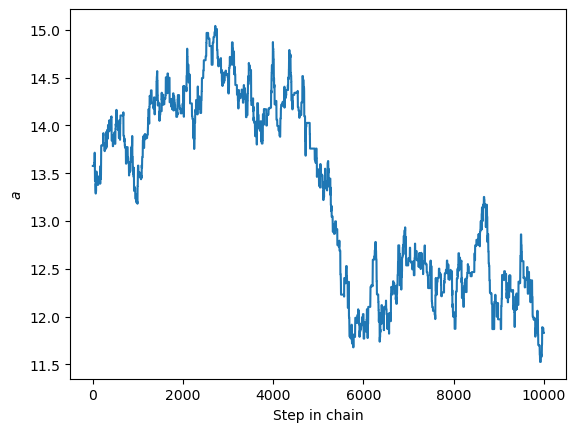

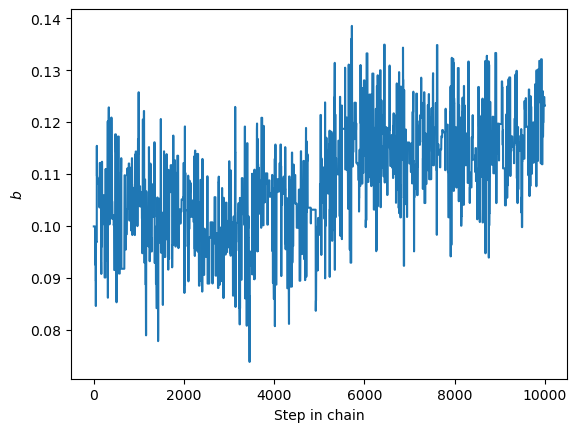

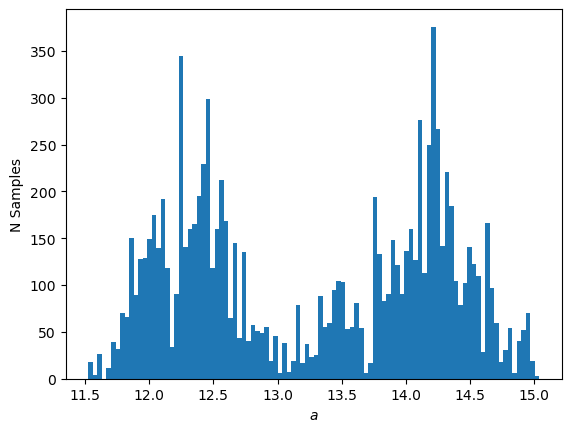

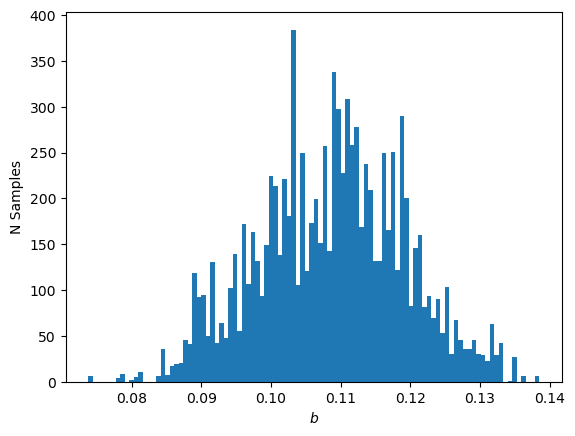

After running for 1000 steps:
Acceptance rate is  0.0991

Total of 0 test failures


In [7]:
# It's helpful to start an MCMC at a good initial guess.  The worse the initial guess, the more
# "burn in" is required to produce a good chain.  Starting at the MLE solution means that we shouldn't
# need much burn in, but we'll do a little bit anyway.
theta = mle_theta

# Here, we'll run this with a poor choice of step size to show what that looks like.
# In the next cell down, you can play around with modifying this to produce better results.
step_size = (0.1, 0.1)

# Make the mcmc object with the satellite likelihood function
sat_mcmc = MCMC(sat_likelihood, data, theta, step_size, names=('$a$','$b$'))

# Run the burn-in.  
# This is more important for complicated models where you may not really know a good starting point.
# In that case, a rule of thumb is to burn in for about 10% of the total length of the MCMC run.
# Here, we don't need to be so conservative. 
# Using 100 burn in steps is plenty to get the chain to forget precisely where it started.
sat_mcmc.burn(100)

# In the next section, you will pick a good choice for the number of steps.  Here we do 10000.
sat_mcmc.run(10000)

# Plot the samples to check the burn in and sample size.
sat_mcmc.plot_samples()

# Plot histograms of the parameter values to see if they look converged.
sat_mcmc.plot_hist()

print('After running for 1000 steps:')
print('Acceptance rate is ', sat_mcmc.accept_fraction())

### BEGIN HIDDEN TESTS
nfail=0

# Nothing here.  TAs: Just look at the plots to make sure they look correct.

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

Some things to notice about the above plots.

1. The histogram of b looks reasonably Gaussian (albeit noisy).  This is good.
   It means the chain is well sampling the posterior distribution of b around the maximum likelihood value.
2. The samples for b versus step number looks extremely noisy.  This is also good.
   You want the parameter values from one step to the next to jump around a lot relative to the full range of the
   distribution.
3. The histogram of a is not very Gaussian.  It has two peaks and is clearly missing an important part
   of the distribution near the MLE solution.  This means that the chain has not "converged".  It may mean that you
   need to let it run longer, or you may need to adjust the step size.  (Or both.)
4. The samples for a are very correlated from one step to the next.  The a values only slowly meander through the
   allowed space.  The chain happens to have spent most of the time in two portions of the full range, explaining
   why we saw two peaks in the final a histogram.  This is typically a sign that the step size for a is too small.
5. The acceptance rate is only about 0.1.  This is very low.  It means that 9/10 of the candidate steps are rejected.
   This is typically a sign that one or both of the step sizes is too large.  The chain keeps trying to jump too far
   away from the peak, and the step is rejected.
   
Now you have a chance to play around with the two step size parameters to try to pick something more reasonable.
Your goals are:

1. Get the histograms to look reasonably Gaussian (at least single peaked).
2. Get the samples vs step number to look very noisy (not meandering for either one)
3. Get the acceptance rate near 0.5

Once you've done that, feel free to increase the number of samples in the chain.  Don't have it run for more than about 1 minute, but generally the more samples you have, the better the final statistics and contours.

In [8]:
# Problem 2a (continued)
def sat_step_size():
    """Return your choice of step size in (a,b) as a tuple."""
    ### BEGIN SOLUTION
    return (1.0, 0.01)
    ### END SOLUTION

def sat_nsteps():
    """Return how many steps to run"""
    ### BEGIN SOLUTION
    return 200000
    ### END SOLUTION

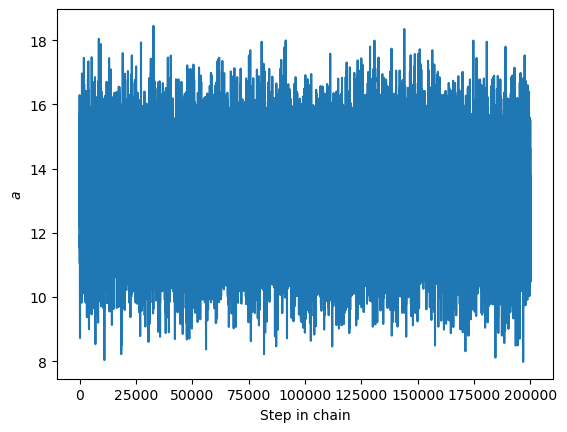

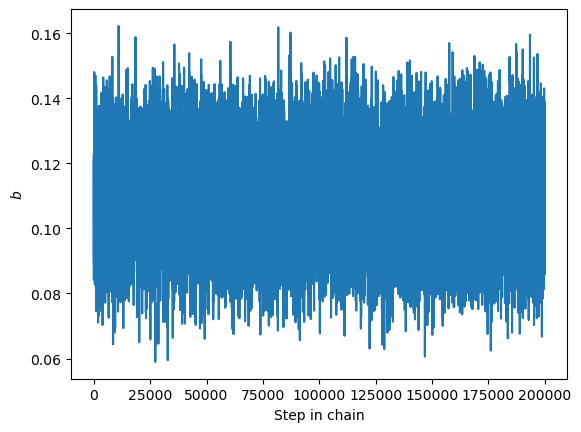

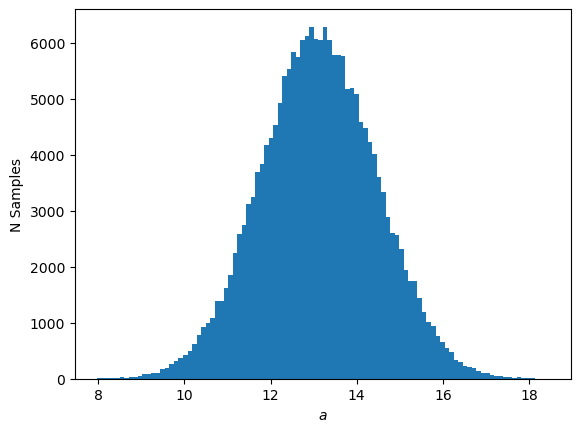

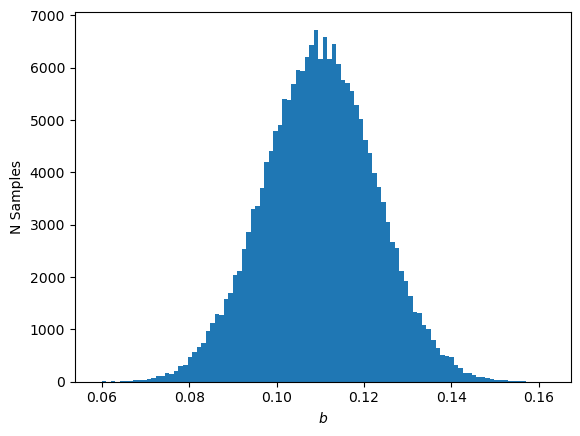

After running for 200000 steps:
Acceptance rate is  0.491635
Time to run chain is 1.4630320072174072 seconds

Total of 0 test failures


In [9]:
theta = mle_theta

sat_mcmc = MCMC(sat_likelihood, data, mle_theta, sat_step_size(), names=('$a$','$b$'))

sat_mcmc.burn(100)

t0 = time.time()
sat_mcmc.run(sat_nsteps())
t1 = time.time()

sat_mcmc.plot_samples()

sat_mcmc.plot_hist()

print('After running for {} steps:'.format(sat_nsteps()))
print('Acceptance rate is ', sat_mcmc.accept_fraction())
print('Time to run chain is {} seconds'.format(t1-t0))

assert 0.3 < sat_mcmc.accept_fraction() < 0.7    # Adjust step sizes if this fails.
assert t1-t0 < 120   # Make sure it is < 60 on your system.  
                     # If it takes longer than 2 min on the TA's computer, we may dock points.
                     # (The official solution gets quite good statistics in only a couple seconds.)

### BEGIN HIDDEN TESTS
nfail=0

# Nothing else here.  The above tests are probably sufficient.

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

In [10]:
# Problem 2b
def calculate_mean(mcmc):
    """Calculate the mean of each parameter according to the samples in the MCMC object.

    Returns the mean values as a numpy array.
    """
    ### BEGIN SOLUTION        
    return np.average(mcmc.get_samples(), axis=0)
    ### END SOLUTION
    
def calculate_cov(mcmc):
    """Calculate the covariance matrix of the parameters according to the samples in the MCMC object.

    Returns the covariance matrix as a 2d numpy array.
    """
    ### BEGIN SOLUTION        
    return np.cov(mcmc.get_samples(), rowvar=False)
    ### END SOLUTION

In [11]:
# Now that we think we have a good chain and that it is converged, we can compute the mean and covariance
# of the parameters.
mean = calculate_mean(sat_mcmc)
cov = calculate_cov(sat_mcmc)

print('Mean values of (a,b) = ', mean)
print('Uncertainties of (a,b) = ', np.sqrt(cov.diagonal()))
print('Covariance matrix = \n', cov)

### BEGIN HIDDEN TESTS
nfail=0

# Check that they calculated the mean and cov correctly given their actual mcmc chain.
true_mean = np.average(sat_mcmc.get_samples(), axis=0)
with log_assert():
    assert np.allclose(mean, true_mean), (mean, true_mean)
    
true_cov = np.cov(sat_mcmc.get_samples(), rowvar=False)
with log_assert():
    assert np.allclose(cov, true_cov), (cov, true_cov)

# Check that they got more or less the right answers.
# If these fail, it might imply an error prior to this step, rather than in the 
# calculate_mean or calculate_cov functions.
with log_assert():
    assert np.isclose(mean[0], 13.1, atol=0.2), mean[0]
with log_assert():
    assert np.isclose(mean[1], 0.11, atol=0.005), mean[1]
with log_assert():
    assert np.isclose(cov[0,0], 1.8, atol=0.5), cov[0,0]
with log_assert():
    assert np.isclose(cov[1,1], 1.6e-4, atol=5e-5), cov[1,1]
with log_assert():
    assert np.isclose(cov[0,1], -1.4e-2, atol=5e-3), cov[0,1]
with log_assert():
    assert np.isclose(cov[0,1], cov[1,0]), (cov[0,1], cov[1,0])

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

Mean values of (a,b) =  [13.11580363  0.10986655]
Uncertainties of (a,b) =  [1.34632072 0.01272294]
Covariance matrix = 
 [[ 1.81257947e+00 -1.38384088e-02]
 [-1.38384088e-02  1.61873127e-04]]

Total of 0 test failures


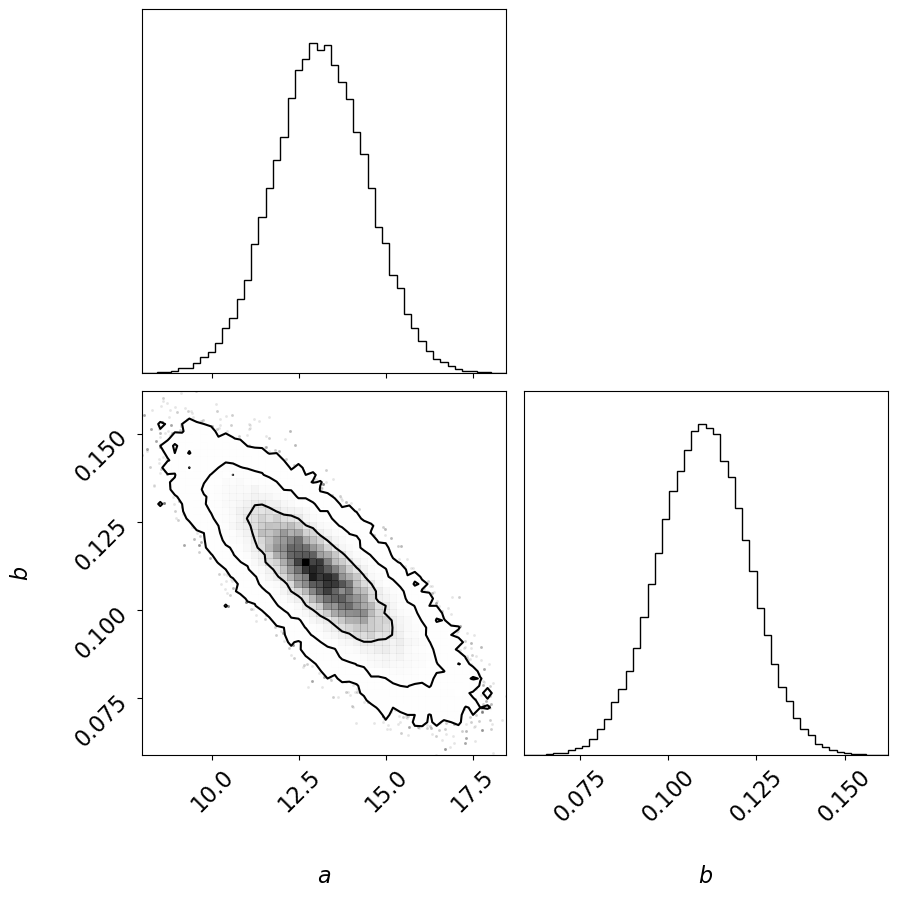

In [12]:
import corner
# Note: You will need to install this.  See http://corner.readthedocs.io/en/latest/install.html

# Problem 2c
def plot_corner(mcmc):
    """Make a corner plot for the parameters a and b with contours corresponding to the same
    delta chisq contours we drew in homework 4.
    """
    # Hint: Use the corner.corner function
    
    ### BEGIN SOLUTION
    samples = mcmc.get_samples()
    matplotlib.rc('font', size=16)
    levels=(0.683, 0.954, 0.9973)  # cf. Numerical Recipes 15.6
    fig = corner.corner(samples, labels=mcmc.names, levels=levels, bins=50)
    fig.set_size_inches(10,10)  # A little bigger than the default.
    plt.show()
    ### END SOLUTION

plot_corner(sat_mcmc)

**Problem 3**

**CODING, EXTRA CREDIT** (3 pts) Repeat Problem 2 for the non-linear regression problem in Problem 1.  
Specifically, generate a 6-parameter Markov Chain, solve for the means and covariance matrix, 
and plot the posterior distributions with $\texttt{corner}$.


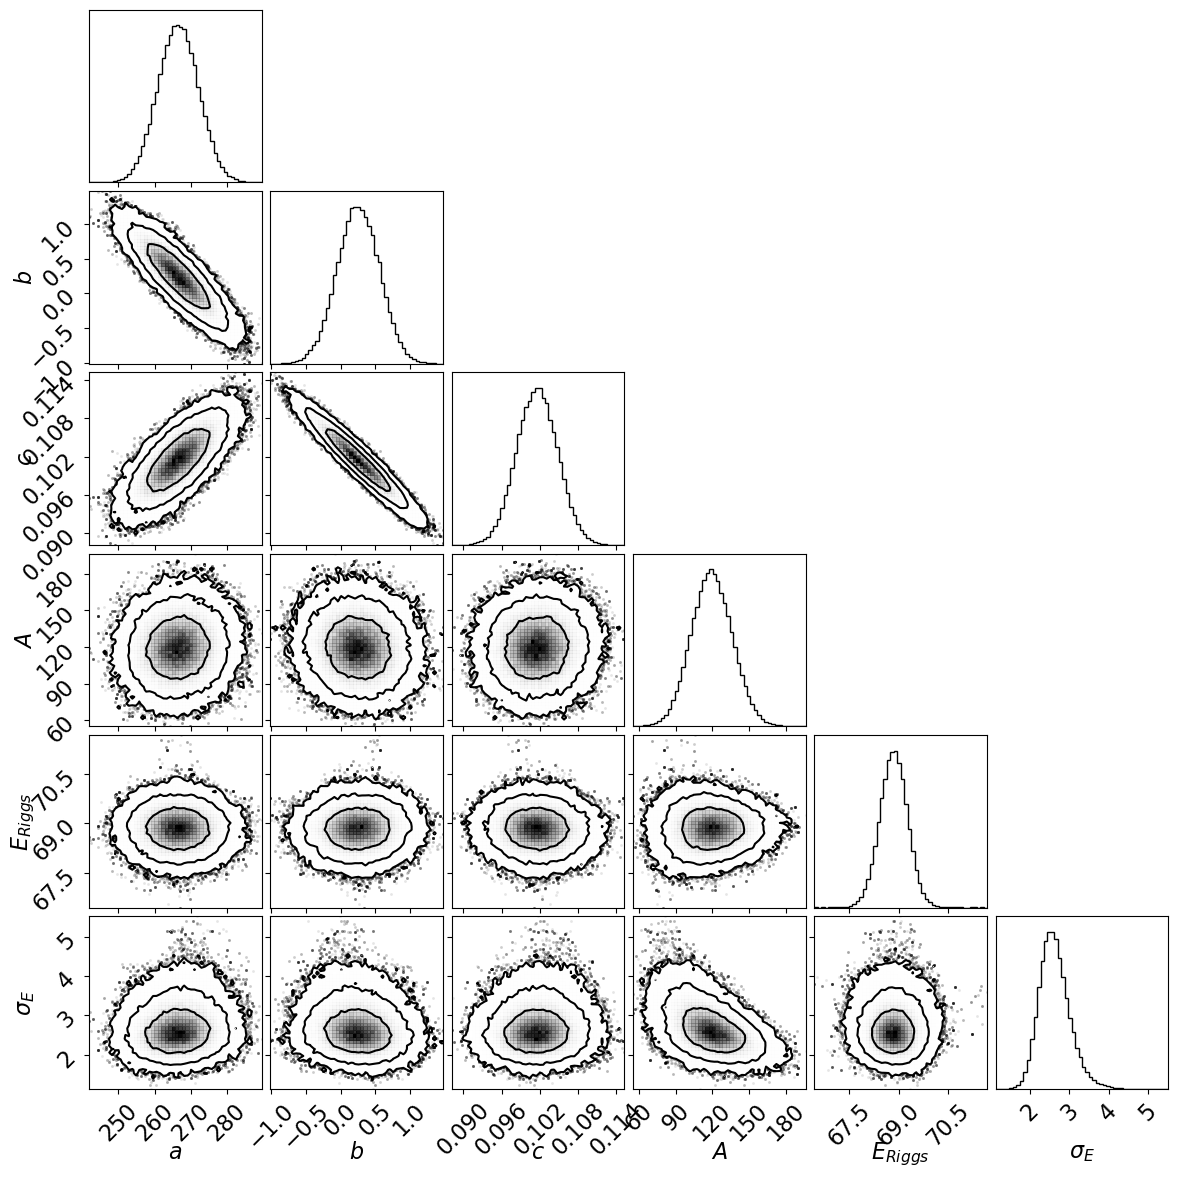

In [13]:
# Problem 3  (EXTRA CREDIT)

# Hint: With more parameters, the optimal acceptance fraction goes down. 
#       More or less 1/Nparams is good.  So about 0.16 in this case.

### BEGIN SOLUTION
def riggs_likelihood(data, theta):
    """Compute the likelihood of our data given a set of parameters theta.
    
    In our case, data is (E, N) and theta is (a, b, c, A, E_Riggs, sigma_E).
    
    Returns the likelihood for this choice of theta.
    """
    E, N = data
    sigma_sq = N
    loglike = -0.5 * np.sum((N-riggs_model(E, *theta))**2/sigma_sq)
    like = np.exp(loglike)
    return like

# Read the data from all runs.
E, N = read_riggs_data(0)
for i in range(1,10):
    Ei, Ni = read_riggs_data(i)
    N += Ni

# The MLE solution gives us a good starting point.
theta, cov = fit_riggs_model(E,N)

# Half sigma for each parameter works pretty well.
step_size = 0.5*np.sqrt(np.diag(cov))
riggs_mcmc = MCMC(riggs_likelihood, (E,N), theta, step_size, 
                  names=('$a$','$b$','$c$','$A$','$E_{Riggs}$','$\sigma_E$'))

# Run the MCMC
riggs_mcmc.burn(1000)
riggs_mcmc.run(1000000)  # Need more steps here to get good contours. 1 million looks pretty good.

# Check acceptance rate.
#print('acceptance rate = ',riggs_mcmc.accept_fraction())

# Make diagnostic plots.
#riggs_mcmc.plot_samples()
#riggs_mcmc.plot_hist()

# Make the corner plot with the contours.
samples = riggs_mcmc.get_samples()
levels=(0.683, 0.954, 0.9973)
fig = corner.corner(samples, labels=riggs_mcmc.names, levels=levels, bins=50)
fig.set_size_inches(12,12)
plt.show()

### END SOLUTION